In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Tahap 1: Memuat dataset
df = pd.read_csv('train.csv')

In [3]:
# Tahap 2: Cek Dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [4]:
# Tahap 3: Mengatasi nilai yang hilang
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_18308\277163128.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_18308\277163128.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [5]:
# Tahap 4: Beri kode per fiturnya
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [6]:
# Tahap 5: Pemilihan fitur
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']


In [7]:
# Tahap 6: Pisahkan data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Tahap 7: Penskalaan fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# Tahap 8: training model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
# Tahap 9: Evaluasi model
y_pred = model.predict(X_test)

print('Akurasi:', accuracy_score(y_test, y_pred))
print('\nLaporan Klasifikasi:\n', classification_report(y_test, y_pred))
print('\nMatriks Konfusi:\n', confusion_matrix(y_test, y_pred))

Akurasi: 0.8212290502793296

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Matriks Konfusi:
 [[91 14]
 [18 56]]


In [12]:
# Tahap 10: Memuat dataset test
test_df = pd.read_csv('test.csv')


In [13]:
# Tahap 11: Mengatasi nilai yang hilang pada dataset test
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_18308\2608003281.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_18308\2608003281.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [14]:
# Tahap 12: Mengkodekan fitur kategorikal pada dataset test
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [15]:
# Tahap 13: Penskalaan fitur pada dataset test
test_features = scaler.transform(test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']])

In [16]:
# Tahap 14: Melakukan prediksi
predictions = model.predict(test_features)

In [17]:
# Tahap 15: Membuat DataFrame dengan PassengerId dan Prediksi
results_df = pd.DataFrame({
   'PassengerId': test_df['PassengerId'],
   'Survived': predictions.astype(int)
})

In [21]:
# Tahap 16: Menyimpan prediksi ke file CSV
results_df.to_csv('predictions_final.csv', index=False)

In [20]:
# Tahap 17: Menampilkan beberapa prediksi pertama
print(results_df.head())
results_df.head()

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         1
4          896         0


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


Accuracy Score: 0.8212290502793296


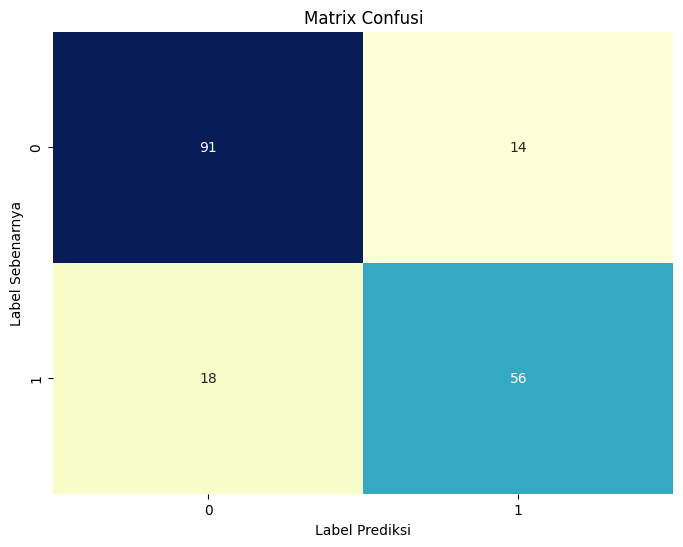

In [26]:
# Tingkay accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)

# Visualisasi Matrix Confusi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='YlGnBu', cbar=False)
plt.xlabel('Label Prediksi')
plt.ylabel('Label Sebenarnya')
plt.title('Matrix Confusi')
plt.show()